# angala hari prasad bl.en.u4aie21009


A1.Use librosa.effects.trim()to remove the silence parts of speech from beginning and end of your recorded signal.Listen to the new signal and perceptually compare the audio with original.

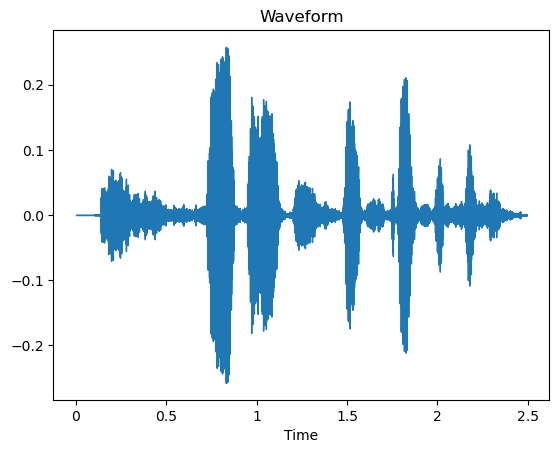

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("kasavanahalli.wav")

librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()


In [2]:
import IPython.display as ipd

print("Original Audio:")
ipd.display(ipd.Audio(y, rate=sr))

Original Audio:


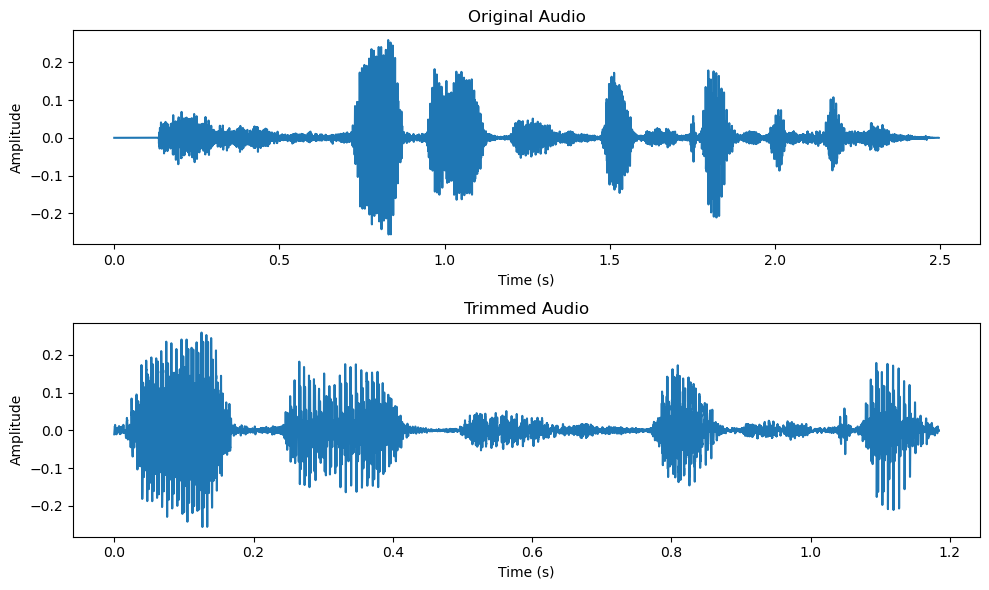

Original Audio:


Trimmed Audio:


In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

original_audio_file = "kasavanahalli.wav"
y, sr = librosa.load(original_audio_file, sr=None)

trimmed_y, index = librosa.effects.trim(y, top_db=10)

plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(trimmed_y)) / sr, trimmed_y)
plt.title('Trimmed Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("Original Audio:")
ipd.display(ipd.Audio(y, rate=sr))

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_y, rate=sr))


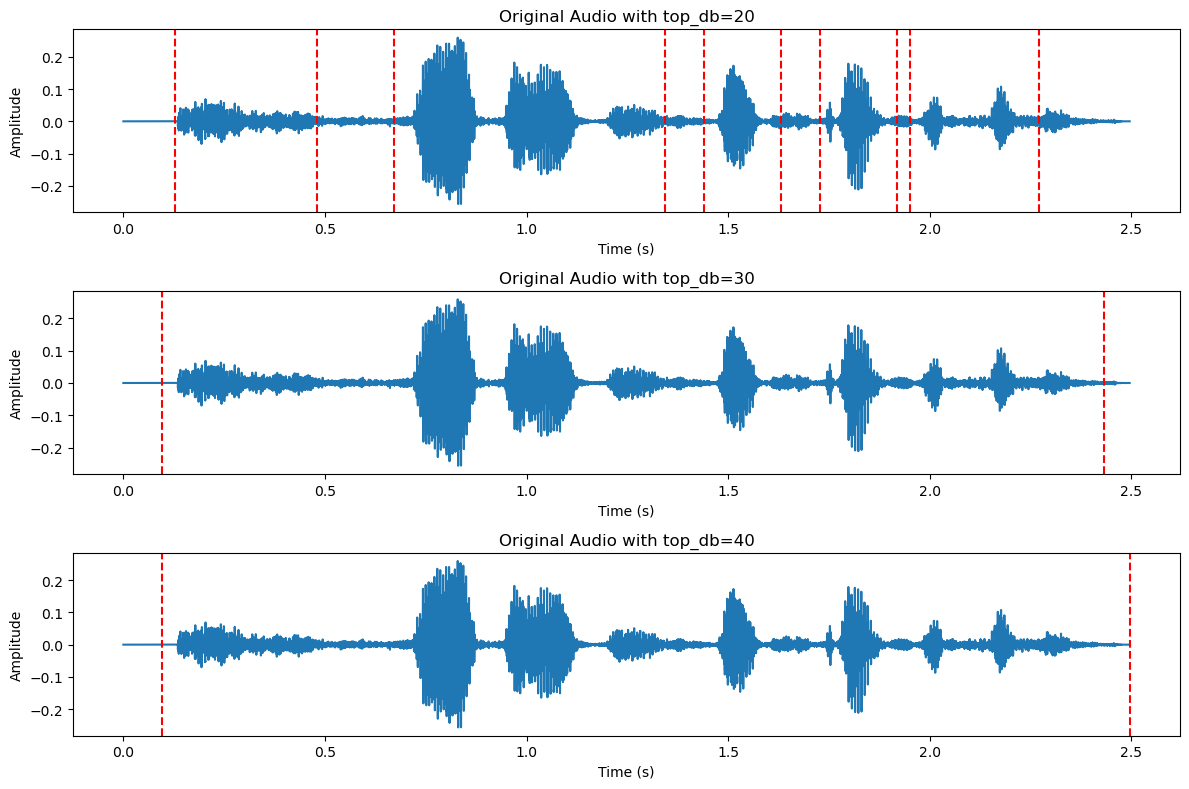

Split Audio with top_db=20:


Split Audio with top_db=30:


Split Audio with top_db=40:


In [4]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

original_audio_file = "kasavanahalli.wav"
y, sr = librosa.load(original_audio_file, sr=None)

top_db_values = [20, 30, 40]  # Experiment with different top_db values

plt.figure(figsize=(12, 8))

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    plt.subplot(len(top_db_values), 1, i + 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title(f'Original Audio with top_db={top_db}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    for interval in intervals:
        plt.axvline(interval[0] / sr, color='r', linestyle='--')
        plt.axvline(interval[1] / sr, color='r', linestyle='--')

plt.tight_layout()
plt.show()

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    split_audio = np.concatenate([y[start:end] for start, end in intervals])

    print(f"Split Audio with top_db={top_db}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))


A2. Use librosa.effects.split()to splitthe recorded speech with detected silences.Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.

In [5]:
N = 1102 
Ek = [] 
for k in range(len(y)-N+1):
    sum = 0
    for i in range(k,N+k):
        sum += y[i]*y[i]
    Ek.append((1/N)*sum)

In [6]:
import numpy as np
Ek_arr = np.array(Ek)
print(Ek_arr)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.26817739e-06
 1.26427040e-06 1.25989267e-06]


In [7]:
import statistics
Em = []
mean = statistics.mean(Ek_arr)
var = statistics.variance(Ek_arr)
for i in range(len(Ek_arr)):
    Em.append((Ek_arr[i] - mean)/var)
Em_arr = np.array(Em)

In [8]:
print(Em_arr)

[-162.23402905 -162.23402905 -162.23402905 ... -162.07477225 -162.07526289
 -162.07581264]


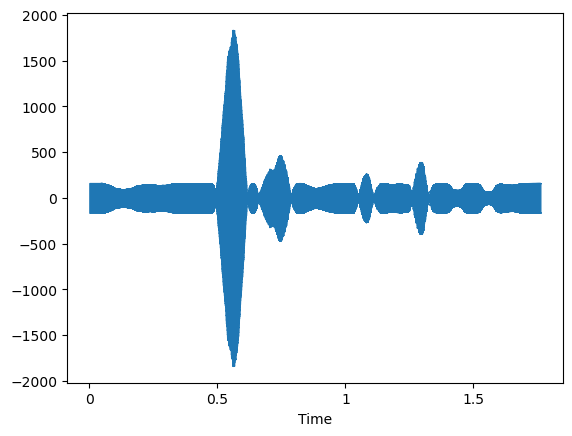

In [9]:
librosa.display.waveshow(Em_arr)

In [10]:
from IPython.display import Audio
Audio(Em_arr,rate = sr)

In [11]:
zero_crossings = librosa.zero_crossings(Em_arr, pad=False)

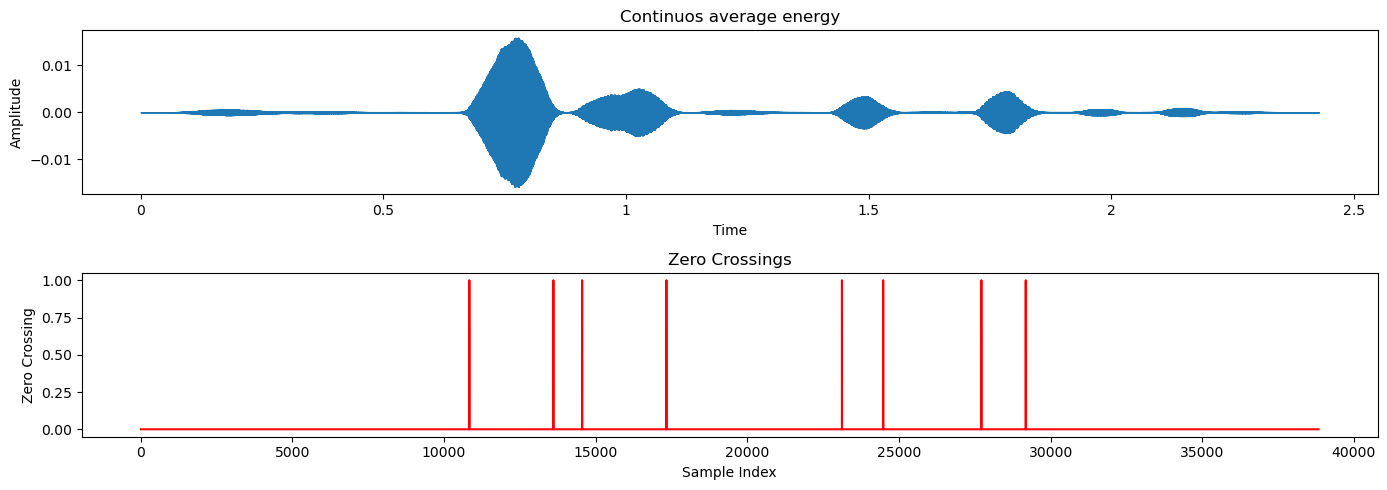

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(Ek_arr, sr=sr)
plt.title('Continuos average energy')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the zero crossings
plt.subplot(2, 1, 2)
plt.plot(zero_crossings, color='r')
plt.title('Zero Crossings')
plt.xlabel('Sample Index')
plt.ylabel('Zero Crossing')
plt.tight_layout()
plt.show()